In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import re

# Your Google Drive link
link = "https://drive.google.com/file/d/1SWG1m9Dtq3Vb75nbtIC8ugs4UNiV3Jwv/view?usp=drive_link"

# Extract the file ID using regex
file_id = re.search('file/d/([a-zA-Z0-9_-]+)', link).group(1)

print(file_id)

1SWG1m9Dtq3Vb75nbtIC8ugs4UNiV3Jwv


In [ ]:
!pip install gdown
import gdown

# File ID extracted from the link
file_id = '1SWG1m9Dtq3Vb75nbtIC8ugs4UNiV3Jwv'

# Create the download URL and download using gdown
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'training_set.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SWG1m9Dtq3Vb75nbtIC8ugs4UNiV3Jwv
To: /content/training_set.zip
100%|██████████| 182M/182M [00:07<00:00, 23.9MB/s]


'training_set.zip'

In [ ]:
!unzip /content/training_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/cats/cat.3705.jpg  
  inflating: training_set/cats/cat.3706.jpg  
  inflating: training_set/cats/cat.3707.jpg  
  inflating: training_set/cats/cat.3708.jpg  
  inflating: training_set/cats/cat.3709.jpg  
  inflating: training_set/cats/cat.371.jpg  
  inflating: training_set/cats/cat.3710.jpg  
  inflating: training_set/cats/cat.3711.jpg  
  inflating: training_set/cats/cat.3712.jpg  
  inflating: training_set/cats/cat.3713.jpg  
  inflating: training_set/cats/cat.3714.jpg  
  inflating: training_set/cats/cat.3715.jpg  
  inflating: training_set/cats/cat.3716.jpg  
  inflating: training_set/cats/cat.3717.jpg  
  inflating: training_set/cats/cat.3718.jpg  
  inflating: training_set/cats/cat.3719.jpg  
  inflating: training_set/cats/cat.372.jpg  
  inflating: training_set/cats/cat.3720.jpg  
  inflating: training_set/cats/cat.3721.jpg  
  inflating: training_set/cats/cat.3722.jpg  
  inflating: training_set/cats/

In [ ]:
import re

# Your Google Drive link
link2 = "https://drive.google.com/file/d/1QScZ5uI8hOAJOXY_cXXive4C3OTz7YKn/view?usp=drive_link"

# Extract the file ID using regex
file_id2 = re.search('file/d/([a-zA-Z0-9_-]+)', link2).group(1)

print(file_id2)

1QScZ5uI8hOAJOXY_cXXive4C3OTz7YKn


In [ ]:
# File ID extracted from the link
file_id2 = '1QScZ5uI8hOAJOXY_cXXive4C3OTz7YKn'

# Create the download URL and download using gdown
url = f'https://drive.google.com/uc?id={file_id2}'
gdown.download(url, 'test_set.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1QScZ5uI8hOAJOXY_cXXive4C3OTz7YKn
To: /content/test_set.zip
100%|██████████| 46.2M/46.2M [00:02<00:00, 20.9MB/s]


'test_set.zip'

In [ ]:
!unzip /content/test_set.zip

Archive:  /content/test_set.zip
   creating: test_set/
   creating: test_set/cats/
  inflating: test_set/cats/_DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg  
  inflating: test_set/cats/cat.4021.jp

In [ ]:
import numpy as np  # Importing the NumPy library for numerical operations like array handling
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib for plotting and visualization
import pandas as pd  # Importing the pandas library for data manipulation and analysis

from keras.layers import Dense,Flatten  # Importing the Dense and Flatten layers from Keras. Dense is used for fully connected layers and Flatten is used to reshape inputs
from keras.models import Model  # Importing the Model class from Keras, which is a central class to assemble layers into an object with training and inference features
from keras.applications.inception_v3 import InceptionV3, preprocess_input  # Importing the InceptionV3 model (a pre-trained CNN model) and its preprocessing function from Keras
from keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator class from Keras which allows real-time data augmentation (like rotation, scaling)
import keras  # Importing the Keras library for building and training deep learning models

In [ ]:
# Initializes the InceptionV3 model with a specified input shape.
# The model is set up without its top (final classification) layer, making it suitable for fine-tuning on a different dataset.
base_model = InceptionV3(input_shape=(256,256,3), include_top=False)
#here 256,256 is the pixel of the image with 3 channels (RGB)


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# Loop through each layer in the base InceptionV3 model and set them as non-trainable.
# This ensures that the weights of these layers won't be updated during training, preserving the pre-trained features.
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
# Flatten the output of the base_model. This transforms the 2D spatial data into a 1D vector.
x = Flatten()(base_model.output)

# Add a dense (fully connected) layer with 2 units and a sigmoid activation function.
# This will be used for binary classification.
x = Dense(units=2, activation='sigmoid')(x)

# Create the final model by combining the input of the base model with our new dense layer.
model = Model(base_model.input, x)

# Compile the model:
# - Using the 'adam' optimizer for gradient-based optimization.
# - Using binary cross-entropy as the loss function since it's a binary classification task.
# - Tracking 'accuracy' as the evaluation metric.
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Display the structure and parameters of the model.
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
# Initialize an ImageDataGenerator for data augmentation and preprocessing:
# - `featurewise_center`: Boolean, set input mean to 0 over the dataset, feature-wise.
# - `rotation_range`: Degree range for random rotations.
# - `width_shift_range`: Fraction of total width for random horizontal shifts.
# - `horizontal_flip`: Boolean, randomly flip inputs horizontally.
# - `preprocessing_function`: Function to preprocess the data. Here, it uses the `preprocess_input` function specific to the InceptionV3 model.
# - `zoom_range`: Range for random zoom.
# - `shear_range`: Shear intensity (angle in counter-clockwise direction in degrees).
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=0.4,
    width_shift_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    zoom_range=0.4,
    shear_range=0.4
)

# Load images from the specified directory and preprocess them using the defined `train_datagen`.
# Images are resized to 256x256 pixels, and batches of 36 images are created.
train_data = train_datagen.flow_from_directory(
    directory="/content/training_set",
    target_size=(256, 256),
    batch_size=36
)


Found 8005 images belonging to 2 classes.


In [ ]:
# Access the mapping of class names (labels) to integer indices generated by the ImageDataGenerator
# after processing the provided directory of training data.
train_data.class_indices


{'cats': 0, 'dogs': 1}

In [ ]:

# Assuming you've already set up train_datagen and train_data like in your previous code:
  # Compute the mean of the features to be used for centering
# Access the next batch of images and their corresponding labels from the `train_data` generator.
# `img_arr` contains the image data, while `label` contains the associated labels for that batch.
# First, fit the ImageDataGenerator on the data to compute necessary statistics (like mean).
# Here, we call `next()` to get a single batch and then fit on it.
# In practice, if you have the entire dataset in a numpy array, you'd fit on that instead.
img_arr, label = train_data.next()
train_datagen.fit(img_arr)

# Now, whenever you call train_data.next() in the future, the images will be centered using the statistics computed above.
img_arr, label = train_data.next()


In [ ]:
# Define a function to visualize a batch of images along with their labels.
def plotImages(img_arr, label):

    # Loop through each image in the provided array.
    for idx, img in enumerate(img_arr):

        # Only plot the first 50 images to avoid overwhelming the display.
        if idx <= 50:

            # Set the figure size for the display.
            plt.figure(figsize=(5,5))

            # Display the image.
            plt.imshow(img)

            # Set the title for the image display with its shape and label.
            plt.title(f"Shape: {img.shape} - Label: {label[idx]}")

            # Render the image and its title.
            plt.show()

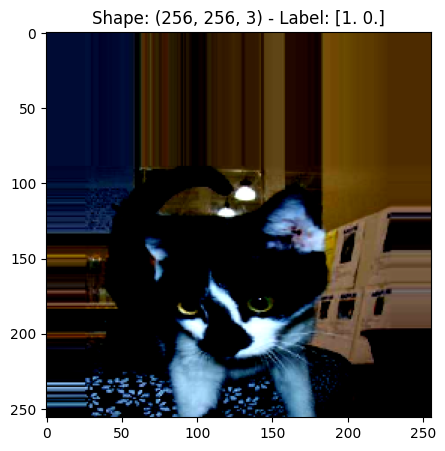

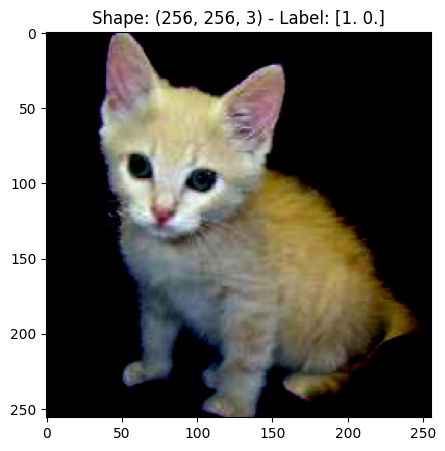

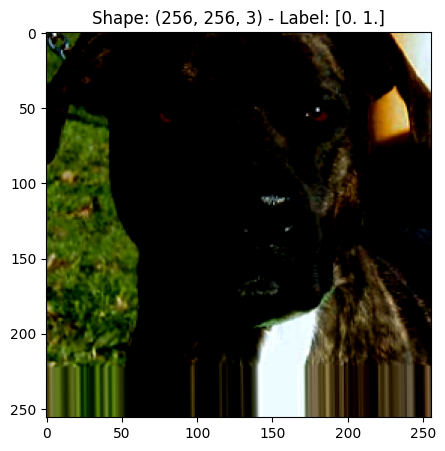

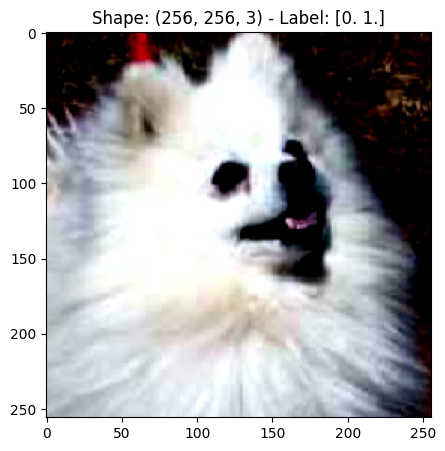

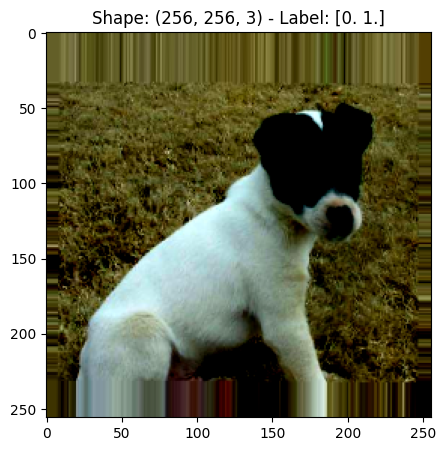

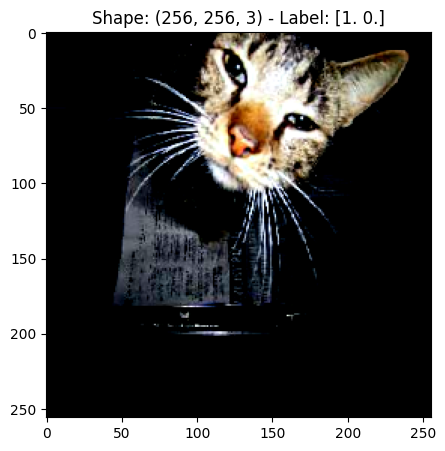

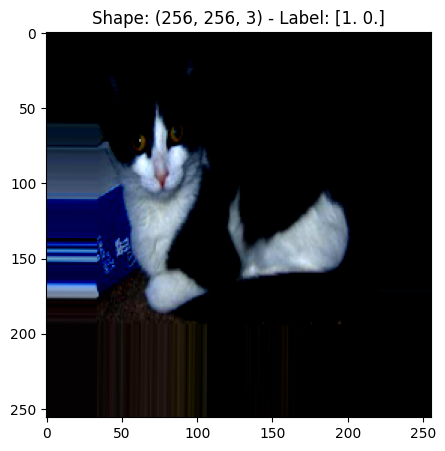

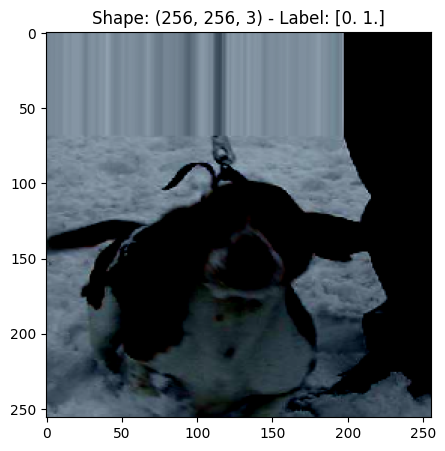

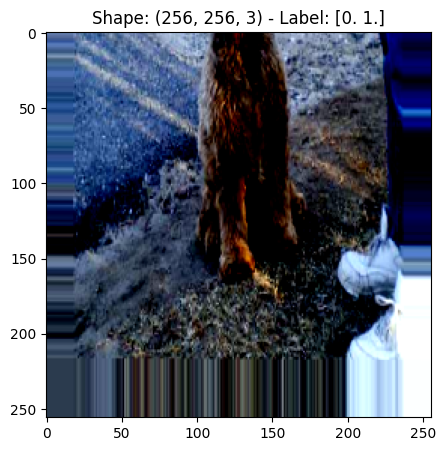

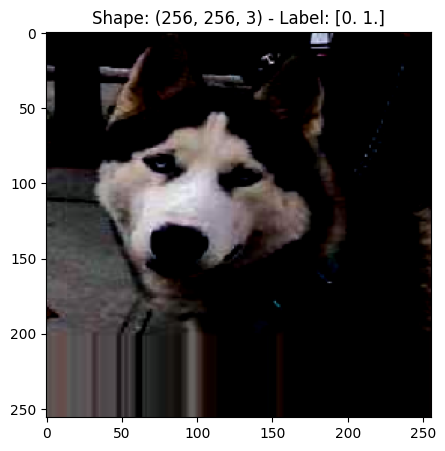

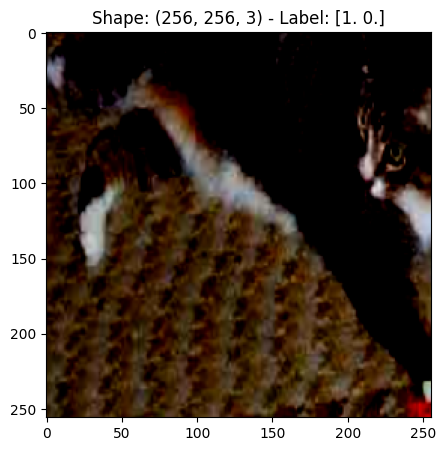

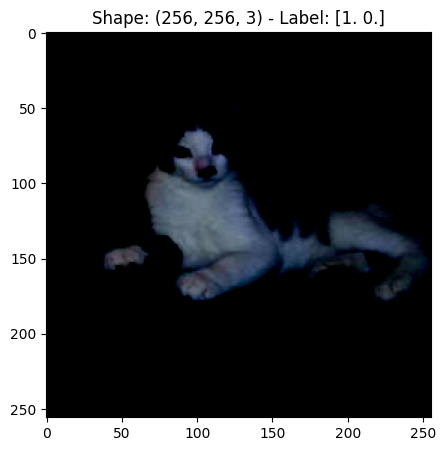

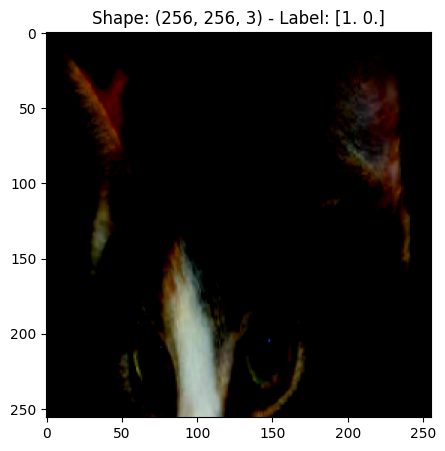

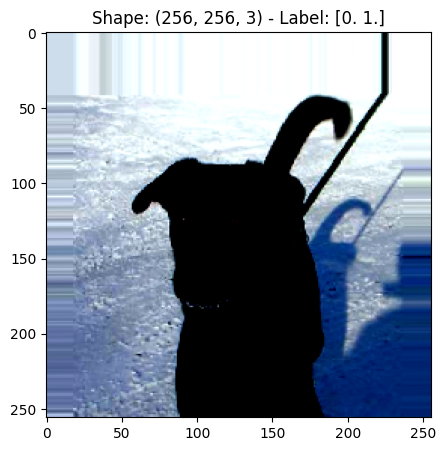

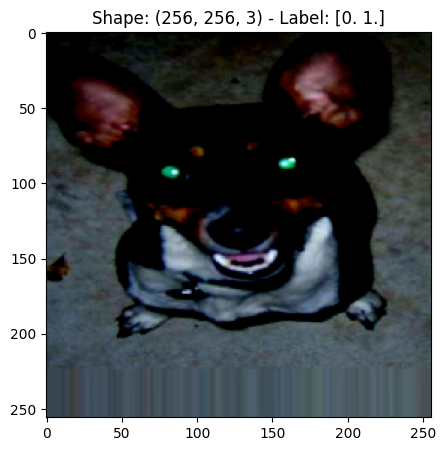

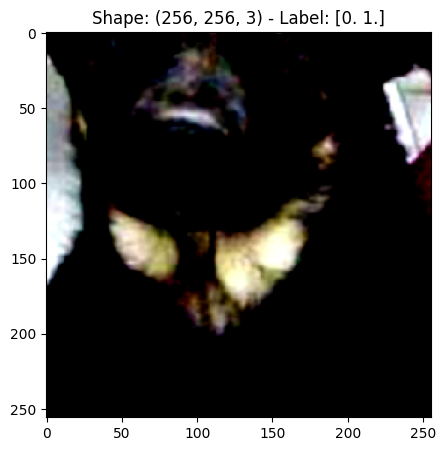

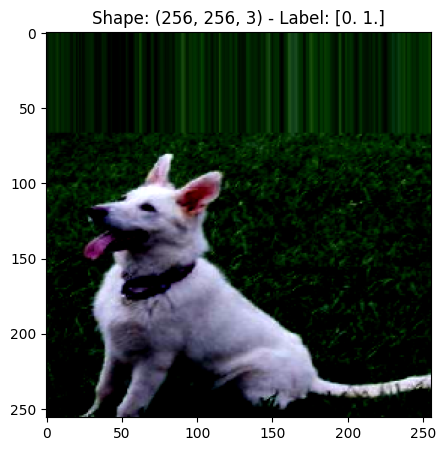

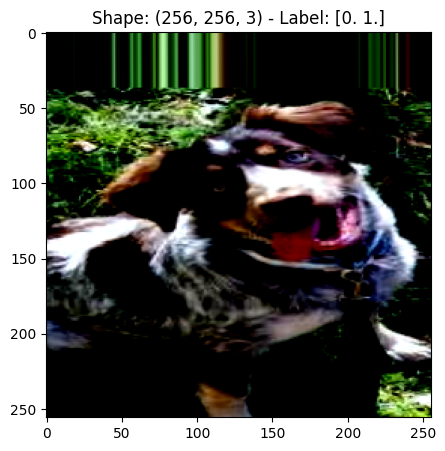

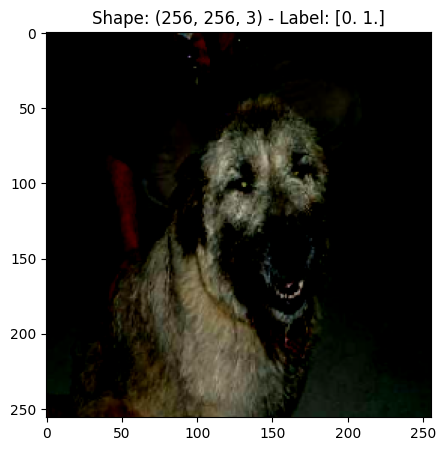

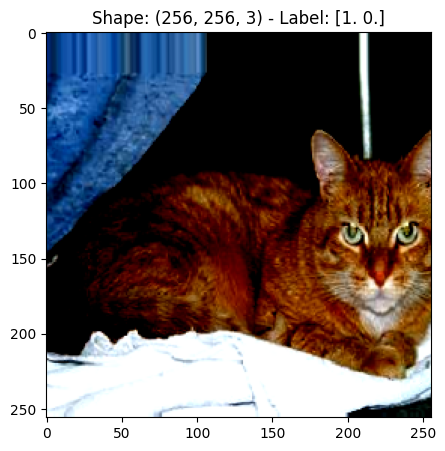

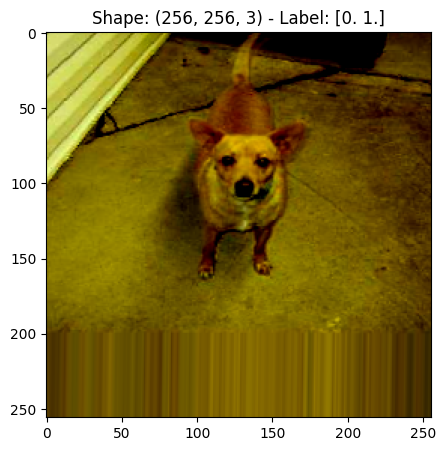

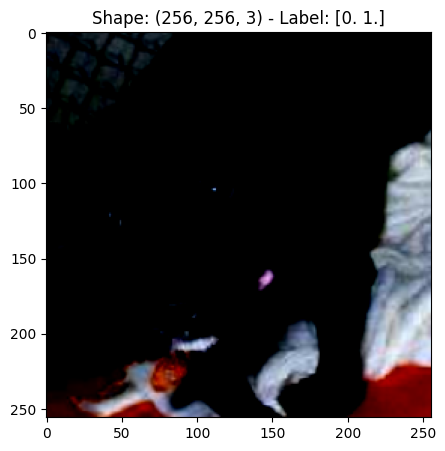

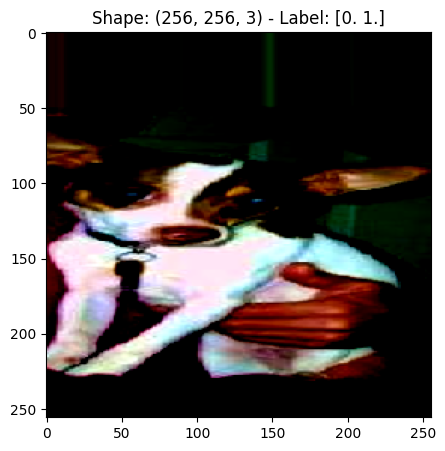

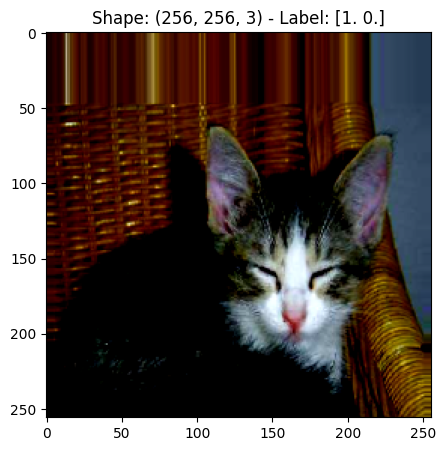

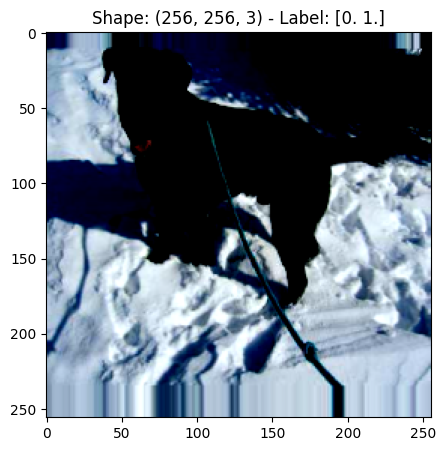

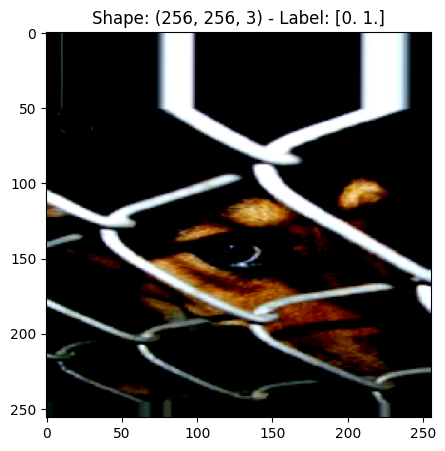

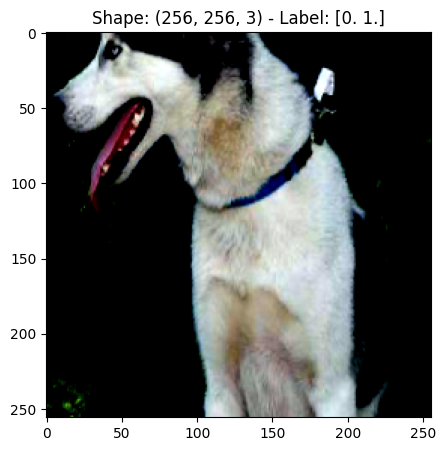

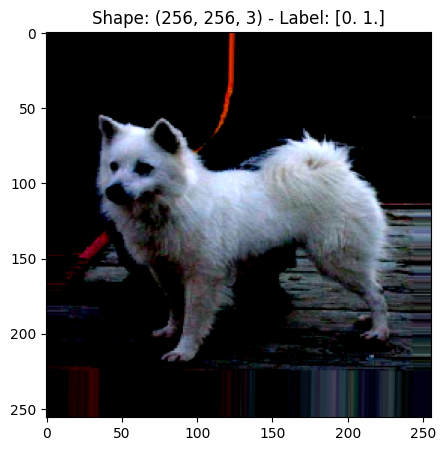

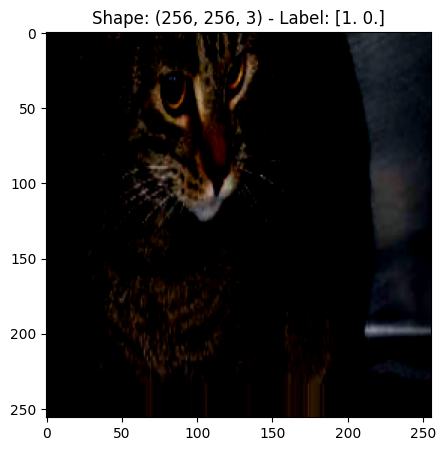

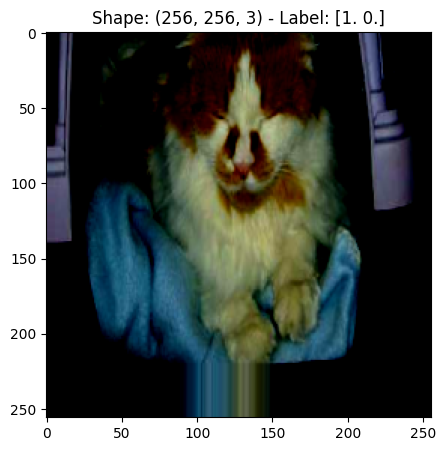

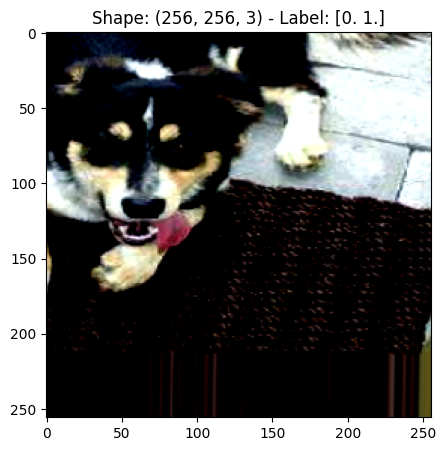

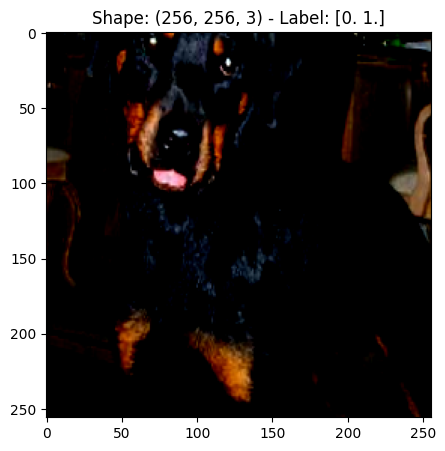

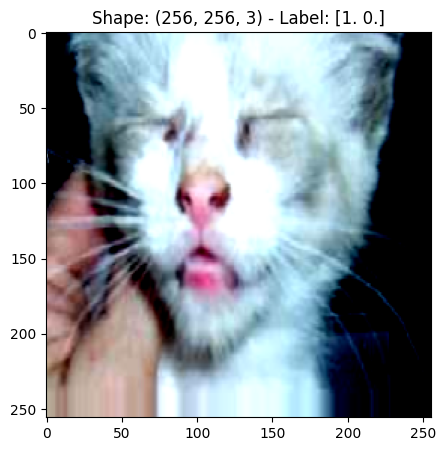

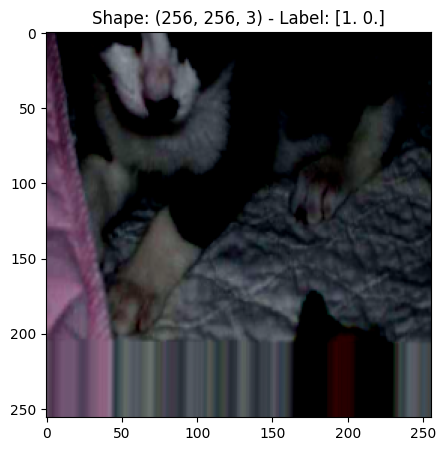

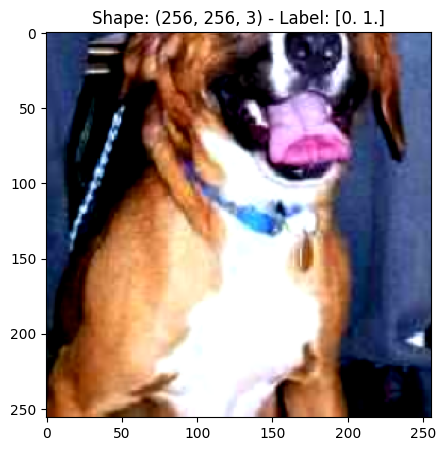

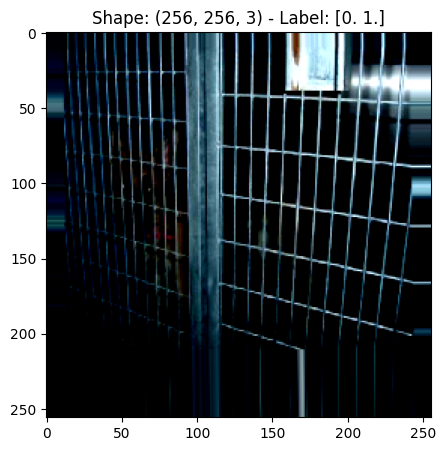

In [ ]:
plotImages(img_arr ,label)

In [ ]:
# Import necessary callback functions from Keras.
# ModelCheckpoint saves the model after every epoch, while EarlyStopping stops training when a monitored metric stops improving.

from keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up ModelCheckpoint:
# - `filepath`: Specifies the location to save the model.
# - `monitor`: The metric to monitor for model saving.
# - `verbose`: Verbosity mode, 1 will print the log for model saving.
# - `save_best_only`: If True, only the model which has achieved the best performance (in terms of `monitor`) will be saved.
mc = ModelCheckpoint(filepath="/content/best_model", monitor="val_accuracy", verbose=1, save_best_only=True)

# Set up EarlyStopping:
# - `monitor`: The metric to monitor for early stopping.
# - `min_delta`: Minimum change in the monitored metric to qualify as an improvement.
# - `patience`: Number of epochs with no improvement after which training will be stopped.
# - `verbose`: Verbosity mode, 1 will print the log for early stopping.
es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience=5, verbose=1)

# Combine the two callbacks into a list. This list can be provided to the `fit` method during model training.
cb = [mc, es]

In [ ]:
# Train the model using the `fit_generator` method:
# - `train_data`: The data generator that will provide batches of data and labels for training.
# - `steps_per_epoch`: Number of batches to process per epoch. Essentially, it dictates how many batches from `train_data` the model will train on for each epoch.
# - `epochs`: Total number of iterations over the entire dataset.
# - `callbacks`: List of callback functions to apply during training. In this case, the list includes ModelCheckpoint (to save best models) and EarlyStopping (to halt training when no further improvement is observed).
his = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, callbacks=cb)

<ipython-input-20-56dc88e437d3>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, callbacks=cb)


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.9708 - accuracy: 0.8306

10/10 [==============================] - 65s 6s/step - loss: 0.9708 - accuracy: 0.8306
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2163 - accuracy: 0.9722

10/10 [==============================] - 61s 6s/step - loss: 0.2163 - accuracy: 0.9722
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9861

10/10 [==============================] - 59s 6s/step - loss: 0.0558 - accuracy: 0.9861
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1343 - accuracy: 0.9806

10/10 [==============================] - 60s 6s/step - loss: 0.1343 - accuracy: 0.9806
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9852

10/10 [==============================] - 55s 5s/step - loss: 0.0892 - accuracy: 0.9852
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9806

10/10 [==============================] - 59s 6s/step - loss: 0.1205 - accuracy: 0.9806
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.1986 - accuracy: 0.9750

10/10 [==============================] - 59s 6s/step - loss: 0.1986 - accuracy: 0.9750
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.2385 - accuracy: 0.9778

10/10 [==============================] - 59s 6s/step - loss: 0.2385 - accuracy: 0.9778
Epoch 8: early stopping


In [ ]:
# Preprocess test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_data = test_datagen.flow_from_directory(directory="/content/test_set",
                                             target_size=(256,256),
                                             batch_size=36,
                                             shuffle=False) # No need to shuffle test data

# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Found 2023 images belonging to 2 classes.
57/57 [==============================] - 302s 5s/step - loss: 0.0696 - accuracy: 0.9921
Test Loss: 0.06960493326187134
Test Accuracy: 0.9920909404754639


2/2 [==============================] - 6s 511ms/step


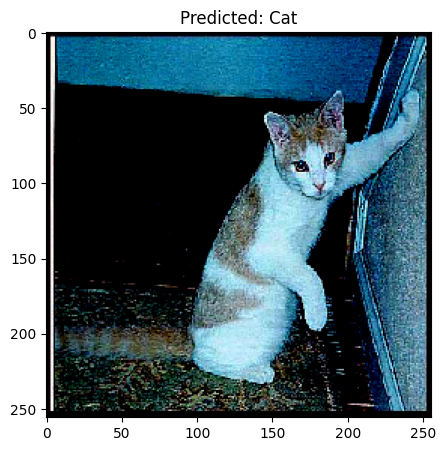

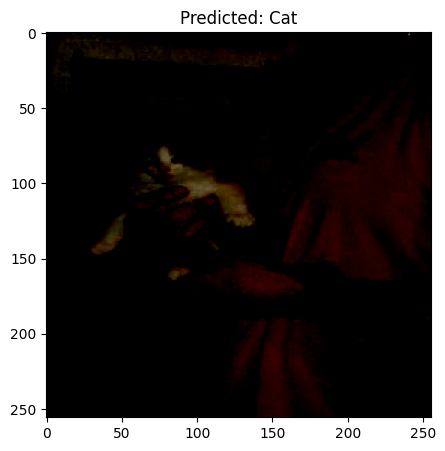

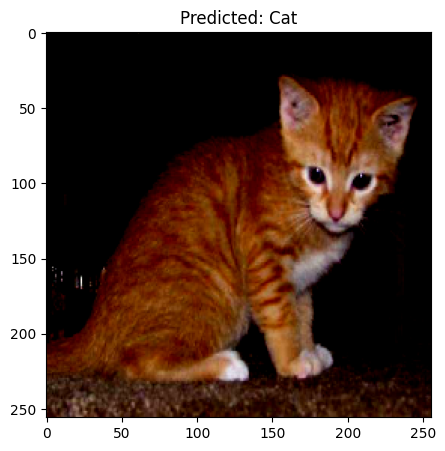

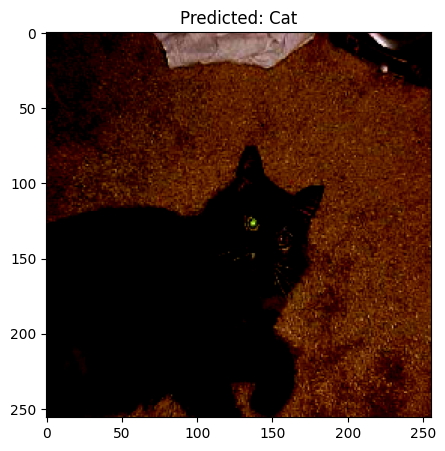

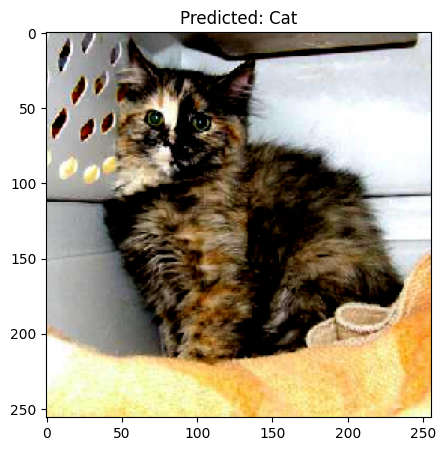

In [ ]:
# Predict on some test images
sample_imgs, _ = test_data.next()
predictions = model.predict(sample_imgs)

# Display the predictions
for idx, img in enumerate(sample_imgs[:5]):  # Displaying first 5 images and predictions
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(f"Predicted: {'Dog' if predictions[idx][1] > 0.5 else 'Cat'}")
    plt.show()

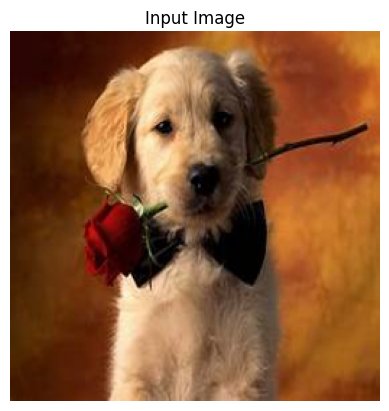

1/1 [==============================] - 0s 163ms/step
Predicted class: Dog


In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from PIL import Image

# Load image
img_path = '/content/dogg.jpeg' # replace with your image path
img = Image.open(img_path)
img = img.resize((256, 256)) # Resize image to the size your model expects

# Display the image
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")  # Turn off axis numbers
plt.show()

# Convert image to numpy array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Model specific preprocessing

# Predict using your trained model
predictions = model.predict(img_array)

# Interpret the prediction
predicted_class = "Dog" if predictions[0][1] > 0.5 else "Cat"
print(f"Predicted class: {predicted_class}")